In [1]:
# example of loading the mnist dataset
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot
# load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11501568/11490434 [==============================] - 0s 0us/step


In [2]:
#noramalize the data of x_train
#simplest way to normalize is to divide by 255
x_train= x_train/255.0
x_test= x_test/255.0

In [3]:
x_train[800].max()

1.0

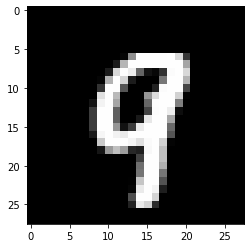

In [20]:
import matplotlib.pyplot as plt
plt.imshow(x_train[800], cmap='gray')

In [5]:
y_train[800]

9

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
#define the NN architecture
from tensorflow import keras
model = keras.models.Sequential()#simple nn
# 1.input
# 2. hidden
# 3. output
#to ass neurons to all 3 layers
model.add(keras.layers.Flatten())  # 28*28 grayscale images = 784 neurons for input layer
model.add(keras.layers.Dense(512,input_shape=(28,28),activation='relu')) #hidden layer neurons #2/3*784-10=512
model.add(keras.layers.Dense(10,activation='softmax'))

In [8]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
mod1 = model.fit(x_train,y_train,epochs = 10)

In [11]:
y_pred = model.predict(x_test)  
import numpy as np
y_pred = np.argmax(y_pred,axis =1) #axis = 1 is for columns
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [12]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9818

In [14]:
#save the model
model.save('model_digitmnist.hdf5')
#hdf5 hierarchial data format version5 
#used to store the nn model in a file

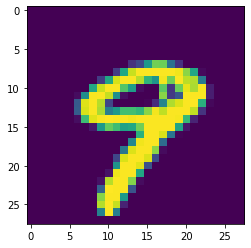

In [18]:
#for one value
i=9
y_pred = model.predict(x_test[i].reshape(1,28,28))
y_pred = np.argmax(y_pred)
y_pred
plt.imshow(x_test[i])